#### Simulación de reactores

Paqueteria utilizada

In [15]:
using PyPlot

##### Reactor por lotes no isotermicos: Problema 28.3 de Métodos númericos para ingenieros (Chapra, 7ma ed)

Un balance de masa para un producto químico completamente mezclado en un reactor se escribe así
$$V\frac{dc}{dt}=F-Qc-kVc^2$$
donde $V$ = volumen (12 $m^3$), $c$ = concentración ($g/m^3$), $F$ = tasa de alimentación (17.5 $g/min$), $Q$ = tasa de flujo (1 $m^3/min$) y $k$ = tasa de reacción de segundo orden (0.15 $m^3/g\cdot min$). Si $C(0)$ = 0. resuelva la EDO hasta que la concentración alcance un nivel estable. 

Datos

In [16]:
Q = 1 # m^3/min
V = 12 # m^3 
k = 0.15 # m^3/min*g
F = 17.5 # g/min
C0 = 0.0 # g/m^3

0.0

Tiempo de analisis

In [17]:
tiempo = collect(1:60)

60-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13
  ⋮
 49
 50
 51
 52
 53
 54
 55
 56
 57
 58
 59
 60

Modelo discretizado

In [18]:
Ct(C) = F/V - C*(1 + Q/V + k*C) + C0

Ct (generic function with 1 method)

Usamos un ciclo para realizar el cálculo de cada concentración

In [19]:
Ct_list = [C0]
for i in tiempo
    C_cal = Ct(Ct_list[i])
    append!(Ct_list, C_cal)
    global C0 = Ct_list[i+1]
end

Gráfico de resultados

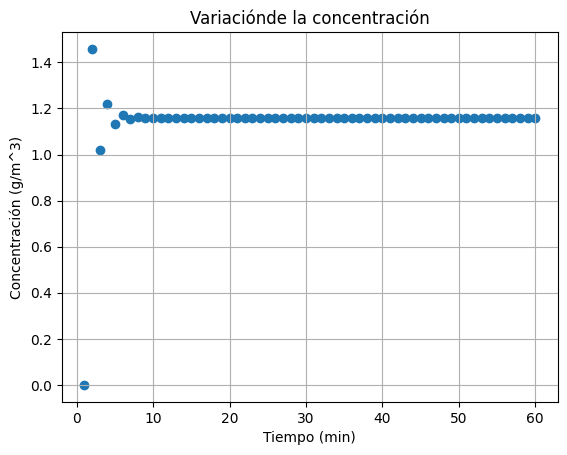

In [20]:
title("Variaciónde la concentración")
scatter(tiempo, Ct_list[1:60])
xlabel("Tiempo (min)")
ylabel("Concentración (g/m^3)")
grid()

##### Reactor por lotes no isotermicos: Problema 28.11 de Métodos númericos para ingenieros (Chapra, 7ma ed)

Un reactor de procesamiento por lotes no isotérmico está descrito por las ecuaciones siguientes: 
$$\frac{dC}{dt}=-e^{\frac{-10}{T+273}}C$$
$$\frac{dT}{dt}=1000e^{\frac{-10}{T+273}}C-10(T-20)$$
donde $C$ es la concentración del reactantesy $T$ es la temperatura del reactor. Inicialmente, el reactor se encuentra a 15 °C y tiene una concentración de reactande igual a 1.0 mol/L. Encuentre la concentración y temperatura del reactor como función del tiempo.

##### Solucion

Condiciones iniciales

In [21]:
T0 = 15.0 # °C
C0 = 1.0 # mol/l
T_list = [T0]
C_list = [C0]

1-element Vector{Float64}:
 1.0

Modelos discretizados

In [22]:
Ct(T) =  C0 /(1 + exp(-10/(T + 273.15)))
Tt(T) = 1000*exp(-10/(T + 273.15))*Ct(T) - 10*(T - 20) + T0 - T

Tt (generic function with 1 method)

Dado que tenemos que encontrar el valor de $T_{t}$ para cada valor calculado de $C_t$ utilizamos un método de busqueda de raices. En este caso usaremos el método de la secante

In [23]:
function Dif_Atras(f, xi, h)
    x0 = xi - h
    fx_prima = (f(xi) - f(x0))/h
    return fx_prima
end

# Método de la secante
function Secante(f, x0, h, ϵ)
    while f(x0) <= -ϵ || f(x0) >= ϵ
        xr = x0 - f(x0)/Dif_Atras(f, x0, h)
        x0 = xr
    end
    return x0
end

Secante (generic function with 1 method)

Usamos un ciclo para realizar el cálculo de cada concentración y temperatura en el mismo tiempo que el ejercicio anterior

In [24]:
for i in tiempo
    T_cal = Secante(Tt, T_list[i], 100, 0.0001)
    append!(T_list, T_cal)
    C_cal = Ct(T_list[i+1])
    append!(C_list, C_cal)
    global T0 = T_list[i+1] # Cambiamos el valor de T0 al valor encontrado
    global C0 = C_list[i+1] # Cambiamos el valor de C0 al valor encontrado
end

Gráfico de resultados

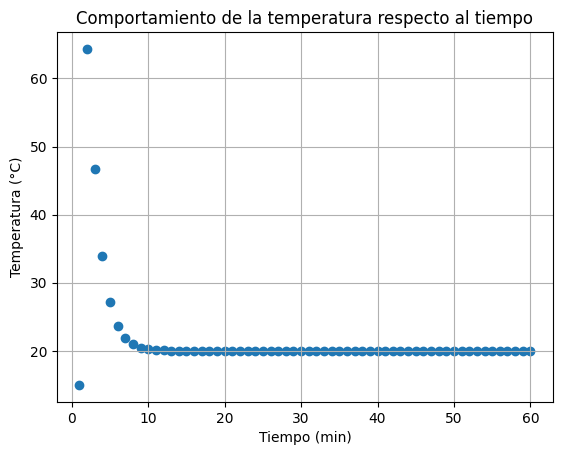

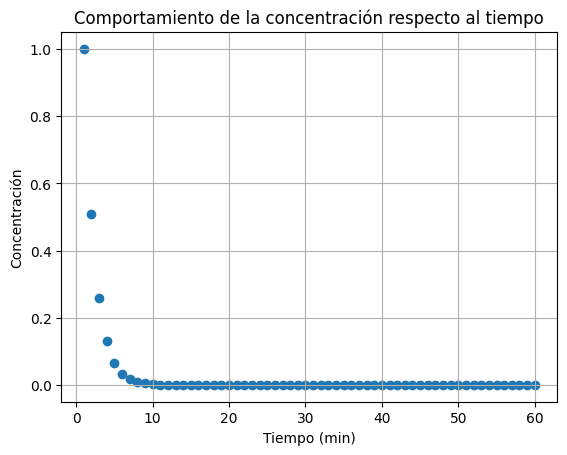

In [25]:
figure(1)
scatter(tiempo, T_list[1:60])
title("Comportamiento de la temperatura respecto al tiempo")
xlabel("Tiempo (min)")
ylabel("Temperatura (°C)")
grid()

figure(2)
scatter(tiempo, C_list[1:60])
title("Comportamiento de la concentración respecto al tiempo")
xlabel("Tiempo (min)")
ylabel("Concentración")
grid()